# Assignment 1

## Mark Haskins


### Problem 1

In [325]:
import numpy as np
import pandas as pd

In [326]:
adult_df = pd.read_csv("adult-modified.csv")
adult_df

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9407,38,Private,10,Married,White,Male,60,>50K
9408,25,Private,9,Single,White,Female,8,<=50K
9409,21,Private,10,Single,Black,Male,40,<=50K
9410,38,Private,2,Married,White,Male,53,<=50K


#### General Characteristis of data including means, standard devaitons, min, max and quartiles. 

In [327]:
adult_df.dtypes

age                int64
workclass         object
education          int64
marital-status    object
race              object
sex               object
hours-per-week     int64
income            object
dtype: object

In [328]:
adult_df.describe()

,age,education,hours-per-week
count,9412.000000,9412.000000,9412.000000
mean,38.357310,10.125266,41.080217
std,12.962135,2.542118,11.884590
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


####  Frequencies of categorical attributes: workclass, martial-status, race, and income

In [329]:
adult_df['workclass'].value_counts()

Private     6947
Public      1317
Self-emp    1148
Name: workclass, dtype: int64

In [330]:
adult_df['marital-status'].value_counts()

Married    4737
Single     4675
Name: marital-status, dtype: int64

In [331]:
adult_df['race'].value_counts()

White          8062
Black           892
Asian           291
Amer-Indian      92
Hispanic         75
Name: race, dtype: int64

In [332]:
adult_df['sex'].value_counts()

Male      6383
Female    3029
Name: sex, dtype: int64

In [333]:
adult_df['income'].value_counts()

<=50K    7093
>50K     2319
Name: income, dtype: int64

### Problem 2

In [334]:
%matplotlib inline
import matplotlib.pyplot as plt

#### Boxplots for age, education, and hours-per-week isplay box plots that 

<AxesSubplot:>

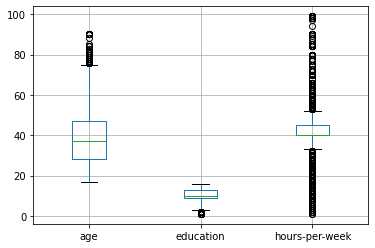

In [335]:
adult_df.boxplot(column=["age","education","hours-per-week"], return_type='axes')


#### Histrograms as subplots for  age, education, and hours-per-week and a scatter plot subplot

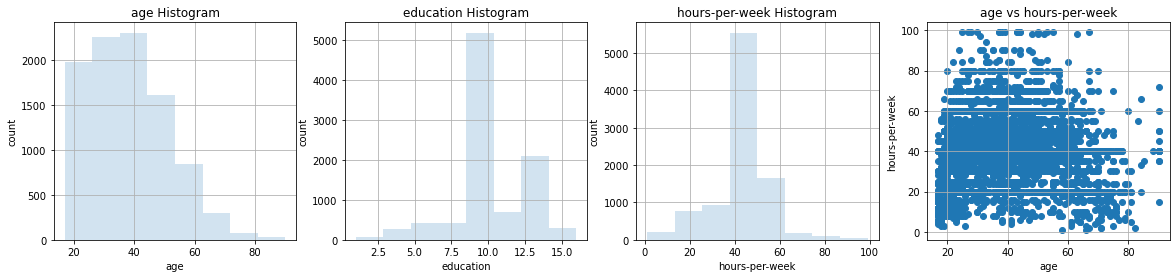

In [336]:
fig = plt.figure(figsize=(20, 4))
h1 = plt.subplot(1,4,1,)
h1.hist(adult_df["age"], bins=8, alpha=0.2)
h1.set_xlabel('age')
h1.set_ylabel('count')
h1.set_title('age Histogram')
h1.grid(True)

h2 = plt.subplot(1,4,2)
h2.hist(adult_df["education"], bins=8, alpha=0.2)
h2.set_xlabel('education')
h2.set_ylabel('count')
h2.set_title('education Histogram')
h2.grid(True)

h3 = plt.subplot(1,4,3)
h3.hist(adult_df["hours-per-week"], bins=8, alpha=0.2)
h3.set_xlabel('hours-per-week')
h3.set_ylabel('count')
h3.set_title('hours-per-week Histogram')
h3.grid(True)

h4 = plt.subplot(1,4,4)
h4.scatter(adult_df["age"].to_numpy(), adult_df["hours-per-week"].to_numpy())
h4.set_xlabel('age')
h4.set_ylabel('hours-per-week')
h4.set_title('age vs hours-per-week')
h4.grid(True)




### Problem 3

#### Bar charts for categorical variables showing frequencies

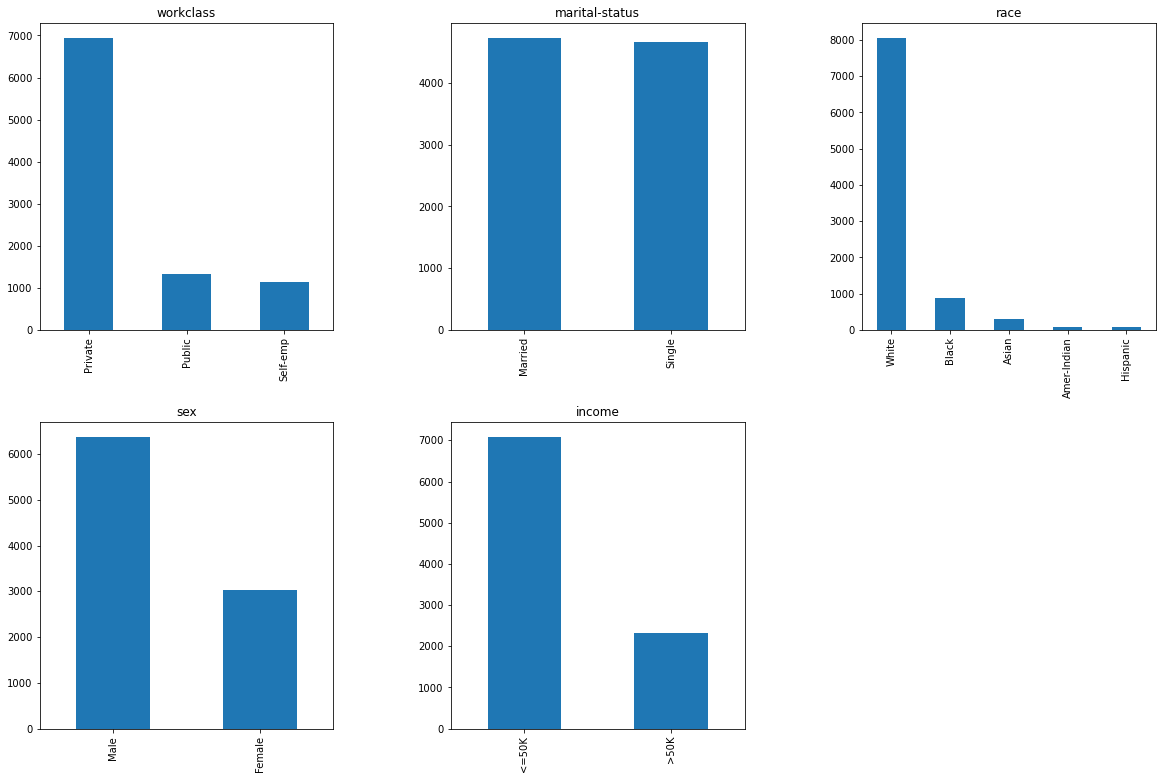

In [337]:
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=.3, wspace=0.4)
ax1 = fig.add_subplot(231)
ax1.set_title("workclass")
ax1 = adult_df["workclass"].value_counts().plot(kind='bar')

ax2 = fig.add_subplot(232)
ax2.set_title("marital-status")
ax2 = adult_df["marital-status"].value_counts().plot(kind='bar')

ax3 = fig.add_subplot(233)
ax3.set_title("race")
ax3 = adult_df["race"].value_counts().plot(kind='bar')

ax4 = fig.add_subplot(234)
ax4.set_title("sex")
ax4 = adult_df["sex"].value_counts().plot(kind='bar')

ax5 = fig.add_subplot(235)
ax5.set_title("income")
ax5 = adult_df["income"].value_counts().plot(kind='bar')

### Problem 4

#### Cross-tab of workclass to income

In [338]:
ct1 = pd.crosstab(adult_df["workclass"], adult_df["income"])
ct1

income,<=50K,>50K
workclass,,
Private,5443,1504
Public,925,392
Self-emp,725,423


#### Barchart of workclass to income

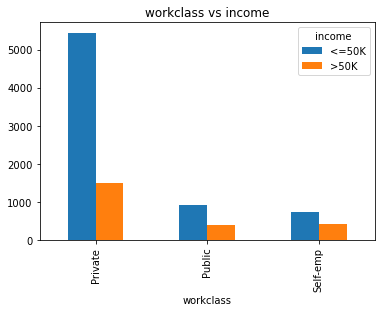

In [339]:
ct1.plot(kind="bar")
plt.title('workclass vs income')
plt.show()


#### Cross-tab of race to income

In [340]:
ct2 = pd.crosstab(adult_df["race"], adult_df["income"])
ct2

income,<=50K,>50K
race,,
Amer-Indian,83,9
Asian,224,67
Black,773,119
Hispanic,69,6
White,5944,2118


#### Cross-tab and Bar Chart with additional column showing % by Race of <=50k

In [341]:
ct2["percent_<=50k"] = ct2["<=50K"]/(ct2["<=50K"]+ct2[">50K"])
ct2

income,<=50K,>50K,percent_<=50k
race,,,
Amer-Indian,83,9,0.902174
Asian,224,67,0.769759
Black,773,119,0.866592
Hispanic,69,6,0.920000
White,5944,2118,0.737286


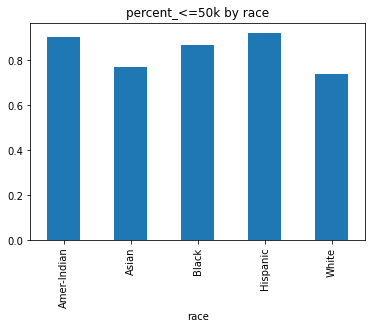

In [342]:
ct2["percent_<=50k"].plot(kind="bar")
plt.title('percent_<=50k by race')
plt.show()

### Problem 5

#### After subsetting the data between low and high income. I can see that the average age, education, and hours-per week are all higher values for the higher income group. Based on life experience, this is usually the case that older and educated individuals that work longer hours tend to have higher incomes. Also about 75% of the adults are in the lower income bracket. Lastly, I did a count of the categorical variables and white, married, men, working in the private sector make up the majority of the high-income bracket.  

In [343]:
low_income = adult_df[adult_df["income"]=="<=50K"]
low_income.describe()

,age,education,hours-per-week
count,7093.000000,7093.000000,7093.000000
mean,36.635979,9.646976,39.567038
std,13.339117,2.397358,11.868506
min,17.000000,1.000000,1.000000
25%,26.000000,9.000000,38.000000
50%,35.000000,9.000000,40.000000
75%,45.000000,10.000000,40.000000
max,90.000000,16.000000,99.000000


In [344]:
high_income = adult_df[adult_df["income"]==">50K"]
high_income.describe()

,age,education,hours-per-week
count,2319.000000,2319.000000,2319.000000
mean,43.622251,11.588185,45.708495
std,10.047667,2.410764,10.678794
min,19.000000,2.000000,1.000000
25%,36.000000,9.000000,40.000000
50%,43.000000,12.000000,40.000000
75%,50.000000,13.000000,50.000000
max,90.000000,16.000000,99.000000


In [345]:
len(low_income)/(len(low_income)+len(high_income))

0.7536124096897577

In [346]:
high_income[["race", "sex", "marital-status", "workclass"]].value_counts()


race         sex     marital-status  workclass
White        Male    Married         Private      1069
                                     Self-emp      320
                                     Public        235
             Female  Married         Private       141
             Male    Single          Private       119
             Female  Single          Private        61
Black        Male    Married         Private        47
White        Female  Married         Public         43
             Male    Single          Self-emp       32
             Female  Married         Self-emp       32
                     Single          Public         29
Asian        Male    Married         Private        29
White        Male    Single          Public         28
Black        Male    Married         Public         24
Asian        Male    Married         Public         12
Black        Female  Married         Private        11
Asian        Male    Married         Self-emp       10
White        Femal

In [347]:
low_income[["race", "sex", "marital-status", "workclass"]].value_counts()


race         sex     marital-status  workclass
White        Male    Single          Private      1465
             Female  Single          Private      1449
             Male    Married         Private      1359
                                     Self-emp      380
             Female  Married         Private       287
                     Single          Public        242
Black        Female  Single          Private       237
White        Male    Married         Public        231
Black        Male    Single          Private       192
White        Male    Single          Self-emp      190
                                     Public        189
Black        Male    Married         Private       104
             Female  Single          Public         78
                     Married         Private        65
White        Female  Single          Self-emp       56
                     Married         Public         55
Asian        Male    Married         Private        50
                  

### Problem 6

#### Converted each categorical attribute into binary  "dummy" attributes while numeric are left unchanged and saved as new dataframe for adult_ssf. (ssf = standard spreadsheet format). Saved new table to csv file. 

In [348]:
adult_ssf = pd.get_dummies(adult_df)
adult_ssf.head(10)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0
5,37,14,40,1,0,0,1,0,0,0,0,0,1,1,0,1,0
6,49,5,16,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7,52,9,45,0,0,1,1,0,0,0,0,0,1,0,1,0,1
8,31,14,50,1,0,0,0,1,0,0,0,0,1,1,0,0,1
9,42,13,40,1,0,0,1,0,0,0,0,0,1,0,1,0,1


In [349]:
adult_ssf.to_csv("adult_numeric.csv")

### Problem 7

#### Created a correlation matrix and showed correlations in decreasing order for both education and income_<50k attributes. Education is highly correlated and negatively correlated with income. The negative correlation is the exact same number due to the binary nature of the two attributes. Income_50k is positively correlated with being single followed by female. 

In [350]:
adult_corr_matrix = adult_ssf.corr()
adult_corr_matrix

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
age,1.000000,0.034733,0.103170,-0.202982,0.080254,0.187633,0.381168,-0.381168,-0.010904,-0.008097,-0.008668,-0.031973,0.022413,-0.071804,0.071804,-0.232261,0.232261
education,0.034733,1.000000,0.141730,-0.154977,0.154462,0.044472,0.050627,-0.050627,-0.039308,0.057360,-0.069029,-0.044845,0.051765,-0.008180,0.008180,-0.329066,0.329066
hours-per-week,0.103170,0.141730,1.000000,-0.097753,-0.021407,0.154025,0.183944,-0.183944,0.002964,0.000550,-0.071442,0.011964,0.055561,-0.221588,0.221588,-0.222686,0.222686
workclass_Private,-0.202982,-0.154977,-0.097753,1.000000,-0.677134,-0.625700,-0.121014,0.121014,-0.007136,-0.015060,0.004632,0.023490,-0.000389,0.072569,-0.072569,0.116453,-0.116453
workclass_Public,0.080254,0.154462,-0.021407,-0.677134,1.000000,-0.150335,-0.002351,0.002351,0.022185,0.012883,0.070250,-0.018927,-0.066491,0.045338,-0.045338,-0.047981,0.047981
workclass_Self-emp,0.187633,0.044472,0.154025,-0.625700,-0.150335,1.000000,0.165075,-0.165075,-0.013931,0.006576,-0.080694,-0.011495,0.071008,-0.145559,0.145559,-0.105593,0.105593
marital-status_Married,0.381168,0.050627,0.183944,-0.121014,-0.002351,0.165075,1.000000,-1.000000,-0.013614,0.017852,-0.104427,0.000605,0.082114,-0.357736,0.357736,-0.414173,0.414173
marital-status_Single,-0.381168,-0.050627,-0.183944,0.121014,0.002351,-0.165075,-1.000000,1.000000,0.013614,-0.017852,0.104427,-0.000605,-0.082114,0.357736,-0.357736,0.414173,-0.414173
race_Amer-Indian,-0.010904,-0.039308,0.002964,-0.007136,0.022185,-0.013931,-0.013614,0.013614,1.000000,-0.017746,-0.032148,-0.008905,-0.242795,0.021711,-0.021711,0.034254,-0.034254
race_Asian,-0.008097,0.057360,0.000550,-0.015060,0.012883,0.006576,0.017852,-0.017852,-0.017746,1.000000,-0.057795,-0.016009,-0.436496,0.001773,-0.001773,0.006693,-0.006693


In [351]:
adult_corr_matrix["education"].sort_values(ascending=False)


education                 1.000000
income_>50K               0.329066
workclass_Public          0.154462
hours-per-week            0.141730
race_Asian                0.057360
race_White                0.051765
marital-status_Married    0.050627
workclass_Self-emp        0.044472
age                       0.034733
sex_Male                  0.008180
sex_Female               -0.008180
race_Amer-Indian         -0.039308
race_Hispanic            -0.044845
marital-status_Single    -0.050627
race_Black               -0.069029
workclass_Private        -0.154977
income_<=50K             -0.329066
Name: education, dtype: float64

In [352]:
adult_corr_matrix["income_<=50K"].sort_values(ascending=False)


income_<=50K              1.000000
marital-status_Single     0.414173
sex_Female                0.203886
workclass_Private         0.116453
race_Black                0.084836
race_Hispanic             0.034607
race_Amer-Indian          0.034254
race_Asian                0.006693
workclass_Public         -0.047981
race_White               -0.092589
workclass_Self-emp       -0.105593
sex_Male                 -0.203886
hours-per-week           -0.222686
age                      -0.232261
education                -0.329066
marital-status_Married   -0.414173
income_>50K              -1.000000
Name: income_<=50K, dtype: float64

### Problem 8

#### Created age bins for young, mid-age, and old

In [353]:
age_bins = pd.qcut(adult_ssf["age"], 3, labels=["young", "mid-age", "old"])
adult_ssf["age-bins"] = age_bins
adult_ssf.insert(0, "age-bins", adult_ssf.pop("age-bins"))
adult_ssf.head(10)

,age-bins,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,mid-age,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,old,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,mid-age,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,old,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,young,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0
5,mid-age,37,14,40,1,0,0,1,0,0,0,0,0,1,1,0,1,0
6,old,49,5,16,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7,old,52,9,45,0,0,1,1,0,0,0,0,0,1,0,1,0,1
8,young,31,14,50,1,0,0,0,1,0,0,0,0,1,1,0,0,1
9,mid-age,42,13,40,1,0,0,1,0,0,0,0,0,1,0,1,0,1


### Problem 9

#### Min-Max Normalization for hours-per-week

In [354]:
min_hpw = adult_df["hours-per-week"].min()
max_hpw = adult_df["hours-per-week"].max()
norm_hpw = (adult_df["hours-per-week"] - min_hpw) / (max_hpw-min_hpw)
adult_df["hours-per-week_min_max"] = norm_hpw 
adult_df.head(10)

,age,workclass,education,marital-status,race,sex,hours-per-week,income,hours-per-week_min_max
0,39,Public,13,Single,White,Male,40,<=50K,0.397959
1,50,Self-emp,13,Married,White,Male,13,<=50K,0.122449
2,38,Private,9,Single,White,Male,40,<=50K,0.397959
3,53,Private,7,Married,Black,Male,40,<=50K,0.397959
4,28,Private,13,Married,Black,Female,40,<=50K,0.397959
5,37,Private,14,Married,White,Female,40,<=50K,0.397959
6,49,Private,5,Married,Black,Female,16,<=50K,0.153061
7,52,Self-emp,9,Married,White,Male,45,>50K,0.448980
8,31,Private,14,Single,White,Female,50,>50K,0.500000
9,42,Private,13,Married,White,Male,40,>50K,0.397959


#### zscore normalization to standardize the values of all numeric attributes (age, hours-per-week, education

In [355]:
adult_numeric_df = adult_df[["age","education","hours-per-week"]]
adult_numeric_df_std = (adult_numeric_df - adult_numeric_df.mean()) / adult_numeric_df.std()
adult_numeric_df_std.head(10)

,age,education,hours-per-week
0,0.049582,1.130842,-0.090892
1,0.898208,1.130842,-2.362742
2,-0.027566,-0.442649,-0.090892
3,1.129651,-1.229394,-0.090892
4,-0.799044,1.130842,-0.090892
5,-0.104713,1.524215,-0.090892
6,0.821060,-2.016140,-2.110314
7,1.052503,-0.442649,0.329821
8,-0.567600,1.524215,0.750534
9,0.281025,1.130842,-0.090892


#### New dataframe with 3 versions of the hours-per-week attribute (original, normalized, and standardized)

In [356]:
adult_numeric_df_std.rename(columns = {'hours-per-week':'hours-per-week_z_score'}, inplace = True)
adult_numeric_df_std = adult_numeric_df_std.join(adult_df["hours-per-week_min_max"])
adult_numeric_df_std = adult_numeric_df_std.join(adult_df["hours-per-week"])
adult_numeric_df_std.drop(columns ={'age','education'}, inplace=True)
adult_numeric_df_std.head(10)

,hours-per-week_z_score,hours-per-week_min_max,hours-per-week
0,-0.090892,0.397959,40
1,-2.362742,0.122449,13
2,-0.090892,0.397959,40
3,-0.090892,0.397959,40
4,-0.090892,0.397959,40
5,-0.090892,0.397959,40
6,-2.110314,0.153061,16
7,0.329821,0.448980,45
8,0.750534,0.500000,50
9,-0.090892,0.397959,40


### Problem 10 

In [357]:
adult_missing = pd.read_csv("adult-modified-missing-vals.csv", index_col=None, na_values=["?"])
adult_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9802 non-null   float64
 1   workclass       9412 non-null   object 
 2   education       10000 non-null  int64  
 3   marital-status  10000 non-null  object 
 4   race            10000 non-null  object 
 5   sex             10000 non-null  object 
 6   hours-per-week  10000 non-null  int64  
 7   income          10000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


#### Number of Missing values for each attributes

In [358]:

adult_missing.describe(include="all")

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,9802.000000,9412,10000.000000,10000,10000,10000,10000.000000,10000
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Single,White,Male,NaN,<=50K
freq,NaN,6947,NaN,5017,8556,6703,NaN,7621
mean,38.449806,NaN,10.076600,NaN,NaN,NaN,40.530300,NaN
std,13.611949,NaN,2.548172,NaN,NaN,NaN,12.277197,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,27.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,47.000000,NaN,12.000000,NaN,NaN,NaN,45.000000,NaN


#### All instances of data with missing attribues

In [360]:
adult_missing[adult_missing.isnull().any(axis=1)]


,age,workclass,education,marital-status,race,sex,hours-per-week,income
19,NaN,Self-emp,14,Single,White,Female,45,>50K
27,NaN,NaN,10,Married,Asian,Male,60,>50K
40,NaN,Private,5,Married,White,Male,43,<=50K
61,32.0,NaN,4,Married,White,Male,40,<=50K
65,NaN,Private,9,Married,White,Male,40,<=50K
...,...,...,...,...,...,...,...,...
9965,NaN,Private,10,Married,Amer-Indian,Female,40,<=50K
9966,NaN,Private,13,Married,White,Male,50,>50K
9987,67.0,NaN,4,Married,White,Male,40,<=50K
9993,NaN,Private,9,Married,White,Female,15,<=50K


#### Replace null numeric attirbutes with the mean and drop all categorical attributes. Resulting table checking for nulls shows that there are no rows with null values.

In [373]:
age_mean = adult_missing.age.mean()
education_mean = adult_missing.education.mean()
hpw_mean = adult_missing["hours-per-week"].mean()
adult_missing.age.fillna(age_mean, axis=0, inplace=True)
adult_missing.education.fillna(education_mean, axis=0, inplace=True)
adult_missing["hours-per-week"].fillna(hpw_mean, axis=0, inplace=True)
adult_missing.drop(adult_missing[adult_missing.income.isnull()].index, axis=0, inplace=True)
adult_missing.drop(adult_missing[adult_missing.sex.isnull()].index, axis=0, inplace=True)
adult_missing.drop(adult_missing[adult_missing.race.isnull()].index, axis=0, inplace=True)
adult_missing.drop(adult_missing[adult_missing.workclass.isnull()].index, axis=0, inplace=True)
adult_missing.drop(adult_missing[adult_missing["marital-status"].isnull()].index, axis=0, inplace=True)
adult_missing[adult_missing.isnull().any(axis=1)]

,age,workclass,education,marital-status,race,sex,hours-per-week,income
